In [1]:
print("Interdisciplinary Group Project - Team 3")

Interdisciplinary Group Project - Team 3


In [2]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import DataFrame

In [3]:
# reading the files.
# changing the data types with the valid form.

# montly per capita
# 2019-index = 100
monthly_gdp_uk = pd.read_excel("UK_Monthly_GDP.xls")
monthly_gdp_uk['Date'] =  pd.to_datetime(monthly_gdp_uk['Date'])

# annual inflation ratio
annual_inflation_rate_yearly = pd.read_csv("annual_inflation_ratio.csv")
annual_inflation_rate_monthly = pd.read_csv("annual_inflation_ratio2.csv")

annual_inflation_rate_yearly['year'] =  pd.to_datetime(annual_inflation_rate_yearly['year'], format='%Y-%m-%d')
annual_inflation_rate_monthly['year'] =  pd.to_datetime(annual_inflation_rate_monthly['year'], format='%Y-%m-%d')


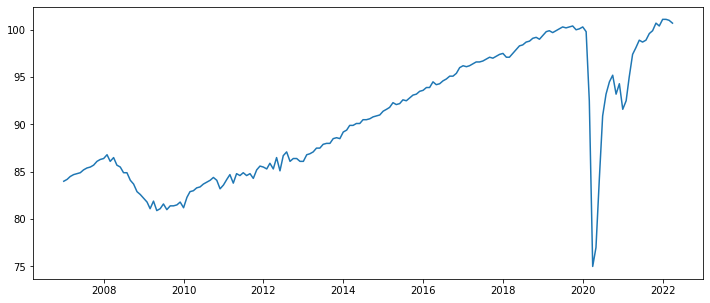

In [4]:
plt.figure(figsize=(12,5))
plt.plot(monthly_gdp_uk["Date"], monthly_gdp_uk["Monthly GDP"])
plt.show()
# Plot-1, the annual gross domestic product.

In [5]:
condition = monthly_gdp_uk[(monthly_gdp_uk["Date"] < "2018-01-01")]
print(min(condition["Monthly GDP"]))

condition = monthly_gdp_uk[(monthly_gdp_uk["Date"] > "2018-01-01")]
print(min(condition["Monthly GDP"]))

condition = monthly_gdp_uk[(monthly_gdp_uk["Monthly GDP"] ==  80.9)]
condition
# the minimum value before the pandemic was 80.9 on "2009-05-01".
# it is clear that the pandemic adversely affected the economy.

80.9
75.0


,Date,Monthly GDP
28,2009-05-01,80.9


In [6]:
monthly_gdp_uk[monthly_gdp_uk["Monthly GDP"] == min(monthly_gdp_uk["Monthly GDP"])]["Date"]
# the day that it had the minimum value.

159   2020-04-01
Name: Date, dtype: datetime64[ns]

In [7]:
monthly_gdp_uk[monthly_gdp_uk["Monthly GDP"] == min(monthly_gdp_uk["Monthly GDP"])]
# if it is neeed as dataframe.

,Date,Monthly GDP
159,2020-04-01,75.0


<AxesSubplot:xlabel='year', ylabel='rate'>

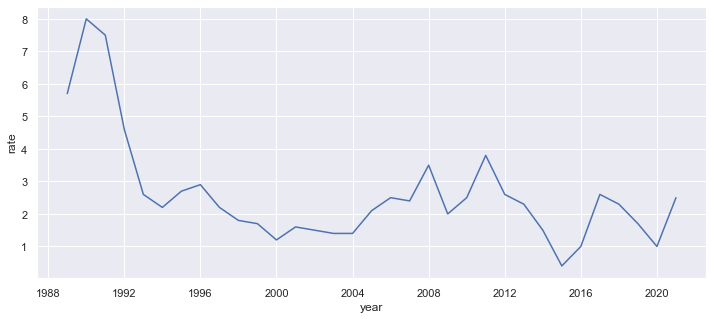

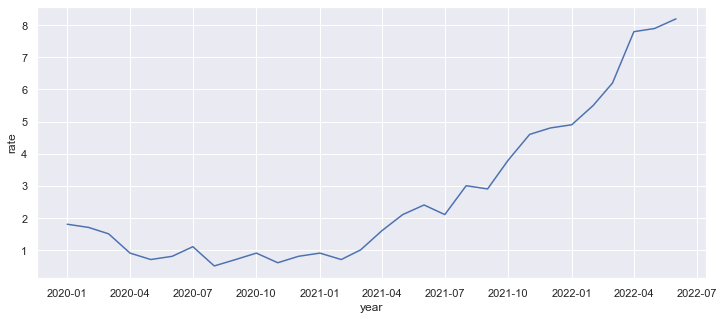

In [8]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (12,5))
sns.lineplot(x="year", y="rate", data=annual_inflation_rate_yearly)


sns.set_theme(style="darkgrid")
plt.figure(figsize = (12,5))
sns.lineplot(x="year", y="rate", data=annual_inflation_rate_monthly)

In [9]:
# reading covid-19 England data.
# renaming the columns.
# changing the data type.
# printing the data types.

covid_data = pd.read_csv("England_Cases_by_Specimen.csv")
covid_data = covid_data[["areaName","date","newCasesBySpecimenDate","cumCasesBySpecimenDate"]]
covid_data.rename(columns = {'areaName':'Country_Name', 'date':'Date', 'newCasesBySpecimenDate':'New_Cases', 'cumCasesBySpecimenDate':'Cumulative_Cases'}, inplace = True)
covid_data['Date'] =  pd.to_datetime(covid_data['Date'])
print(covid_data.dtypes)
covid_data.head()

Country_Name                object
Date                datetime64[ns]
New_Cases                    int64
Cumulative_Cases             int64
dtype: object


,Country_Name,Date,New_Cases,Cumulative_Cases
0,England,2022-06-30,13504,19144946
1,England,2022-06-29,20401,19131442
2,England,2022-06-28,21309,19111041
3,England,2022-06-27,21629,19089732
4,England,2022-06-26,17941,19068103


In [10]:
print("the first day:", covid_data.iloc[882][1], "\nthe last day:", covid_data.iloc[0][1])

# the last case a new case shown up is 30-June-2022
# the first case a new case shown up is 30-January-2020

the first day: 2020-01-30 00:00:00 
the last day: 2022-06-30 00:00:00


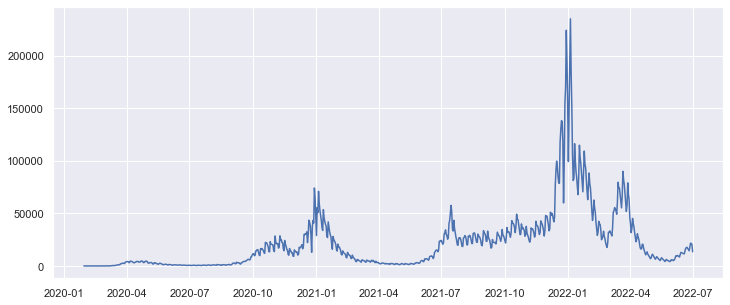

In [11]:
# the number of new cases by time.
plt.figure(figsize=(12,5))
plt.plot(covid_data["Date"], covid_data["New_Cases"])

In [12]:
print("Maximum new case number per a day is:", max(covid_data["New_Cases"]))

Maximum new case number per a day is: 234860


In [13]:
# the following part of this projec was run by the data collected by WHO.

In [14]:
df = pd.read_csv("WHO-COVID-19-global-data.csv")

In [15]:
# creating separated data frames.
# joining the tables by using "Date_reported".

df_uk = df[df["Country_code"] == "GB"]
df_fr = df[df["Country_code"] == "FR"]

df_join = df_uk.join(df_fr.set_index("Date_reported"), lsuffix='UK', rsuffix='FR', on ="Date_reported")
df_join[["New_casesUK",	"Cumulative_casesUK","New_deathsUK","Cumulative_deathsUK","New_casesFR","Cumulative_casesFR","New_deathsFR","Cumulative_deathsFR"]]

# back-up data frames.
df_clean = df_join.drop(columns=["Date_reported","Country_codeUK","CountryUK" , "WHO_regionUK","Country_codeFR","CountryFR","WHO_regionFR"])
df_clean_with_date = df_join.drop(columns=["Country_codeUK","CountryUK" , "WHO_regionUK","Country_codeFR","CountryFR","WHO_regionFR"])
df_clean_with_date["Date_reported"] = pd.to_datetime(df_clean_with_date["Date_reported"])

# to see the first day that the number of case was 1.
# df_clean_with_date[df_clean_with_date["New_casesUK"] == 1]


In [16]:
print("The correlation table between New_casesUK and other columns:")
df_clean_with_date.corr().iloc[0]

The correlation table between New_casesUK and other columns:


New_casesUK            1.000000
Cumulative_casesUK     0.432656
New_deathsUK           0.134456
Cumulative_deathsUK    0.450331
New_casesFR            0.666076
Cumulative_casesFR     0.289363
New_deathsFR           0.076461
Cumulative_deathsFR    0.461253
Name: New_casesUK, dtype: float64

In [17]:
# Financial Times Stock Exchange 100 data.
# Cotation Assistée en Continu 40 data. 
# changing the data types.

ftse_daily = pd.read_csv("HistoricalPricesFTSE100.csv")
ftse_daily["Date"] = pd.to_datetime(ftse_daily["Date"])

cac_daily = pd.read_csv("HistoricalPricesCAC40.csv")
cac_daily["Date"] = pd.to_datetime(cac_daily["Date"])


In [18]:
# creating a table including stock comparison.
# creating a new column calculating the daily changes.

Stock_value_join = ftse_daily.join(cac_daily.set_index("Date"), lsuffix='UK', rsuffix='FR', on ="Date")
Stock_value_join["Daily_Change_UK"] = ( np.array(Stock_value_join[" CloseUK"]) - np.array(Stock_value_join[" OpenUK"]) ) / np.array(Stock_value_join[" CloseUK"])
Stock_value_join["Daily_Change_FR"] = ( np.array(Stock_value_join[" CloseFR"]) - np.array(Stock_value_join[" OpenFR"]) ) / np.array(Stock_value_join[" CloseFR"])
Stock_value_join

,Date,OpenUK,HighUK,LowUK,CloseUK,OpenFR,HighFR,LowFR,CloseFR,Daily_Change_UK,Daily_Change_FR
0,2022-07-22,7270.51,7315.34,7254.02,7276.37,6174.29,6247.35,6168.77,6216.82,0.000805,0.006841
1,2022-07-21,7264.31,7274.73,7200.14,7270.51,6160.37,6233.98,6143.06,6201.11,0.000853,0.006570
2,2022-07-20,7296.28,7347.60,7253.56,7264.31,6229.79,6245.47,6151.36,6184.66,-0.004401,-0.007297
3,2022-07-19,7223.24,7308.99,7174.40,7296.28,6031.60,6213.88,6028.79,6201.22,0.010011,0.027353
4,2022-07-18,7159.01,7268.88,7159.01,7223.24,6070.21,6136.02,6059.87,6091.91,0.008892,0.003562
...,...,...,...,...,...,...,...,...,...,...,...
906,2019-01-07,6837.42,6874.11,6778.01,6810.88,4757.01,4760.27,4690.22,4719.17,-0.003897,-0.008018
907,2019-01-04,6692.66,6850.37,6692.50,6837.42,4649.63,4750.51,4636.79,4737.12,0.021172,0.018469
908,2019-01-03,6734.23,6753.14,6685.09,6692.66,4641.80,4671.28,4607.68,4611.49,-0.006211,-0.006573
909,2019-01-02,6728.13,6753.29,6599.48,6734.23,4642.18,4699.98,4606.20,4689.39,0.000906,0.010067


In [19]:
# cleaning the distertion on the column names.

Stock_value_join.columns = Stock_value_join.columns.str.replace(' ','')
Stock_value_join.columns

Index(['Date', 'OpenUK', 'HighUK', 'LowUK', 'CloseUK', 'OpenFR', 'HighFR',
       'LowFR', 'CloseFR', 'Daily_Change_UK', 'Daily_Change_FR'],
      dtype='object')

In [20]:
# joining the stock table with the cleaned covid data. 
# checking the correlations.
main_table = df_clean_with_date.join(Stock_value_join.set_index("Date"), on ="Date_reported")
main_table.corr()

,New_casesUK,Cumulative_casesUK,New_deathsUK,Cumulative_deathsUK,New_casesFR,Cumulative_casesFR,New_deathsFR,Cumulative_deathsFR,OpenUK,HighUK,LowUK,CloseUK,OpenFR,HighFR,LowFR,CloseFR,Daily_Change_UK,Daily_Change_FR
New_casesUK,1.000000,0.432656,0.134456,0.450331,0.666076,0.289363,0.076461,0.461253,0.410314,0.414011,0.414351,0.418012,0.547664,0.552557,0.543678,0.548433,0.047680,0.028740
Cumulative_casesUK,0.432656,1.000000,-0.112914,0.850608,0.536452,0.979417,-0.123883,0.856190,0.672135,0.683236,0.664316,0.674472,0.619535,0.630336,0.608118,0.617889,0.013618,0.002799
New_deathsUK,0.134456,-0.112914,1.000000,-0.108978,0.037040,-0.123948,0.634132,-0.121757,-0.257407,-0.258465,-0.249315,-0.249674,-0.234129,-0.236015,-0.232107,-0.233128,0.058072,0.009446
Cumulative_deathsUK,0.450331,0.850608,-0.108978,1.000000,0.424231,0.789910,-0.088628,0.995764,0.679322,0.681781,0.685026,0.686665,0.782725,0.788520,0.779709,0.784046,0.048767,0.050615
New_casesFR,0.666076,0.536452,0.037040,0.424231,1.000000,0.466903,0.061595,0.421924,0.361939,0.368257,0.358036,0.364323,0.385906,0.390815,0.377532,0.383621,0.014559,-0.009543
Cumulative_casesFR,0.289363,0.979417,-0.123948,0.789910,0.466903,1.000000,-0.122240,0.797178,0.608218,0.620020,0.598817,0.609644,0.507378,0.518146,0.495994,0.505673,0.008073,-0.001024
New_deathsFR,0.076461,-0.123883,0.634132,-0.088628,0.061595,-0.122240,1.000000,-0.099970,-0.241567,-0.240438,-0.230633,-0.228930,-0.164628,-0.165103,-0.161174,-0.160714,0.088374,0.046565
Cumulative_deathsFR,0.461253,0.856190,-0.121757,0.995764,0.421924,0.797178,-0.099970,1.000000,0.693567,0.696519,0.698752,0.700830,0.797303,0.803278,0.793589,0.798289,0.048147,0.046283
OpenUK,0.410314,0.672135,-0.257407,0.679322,0.361939,0.608218,-0.241567,0.693567,1.000000,0.995953,0.993606,0.989882,0.909622,0.908669,0.905893,0.904890,-0.069795,-0.026629
HighUK,0.414011,0.683236,-0.258465,0.681781,0.368257,0.620020,-0.240438,0.696519,0.995953,1.000000,0.994341,0.995207,0.908084,0.909335,0.904834,0.905600,-0.004951,0.003924


In [21]:
# checking the spesific new_cases column with other desired ones in for loop.
for e in ["OpenUK","HighUK","LowUK","CloseUK","Daily_Change_UK"]:
    print("the corr between new_cases in the UK and {} is: {}".format(e,main_table[e].corr(main_table.New_casesUK )))

the corr between new_cases in the UK and OpenUK is: 0.4103140745026593
the corr between new_cases in the UK and HighUK is: 0.41401068549061826
the corr between new_cases in the UK and LowUK is: 0.4143513915252272
the corr between new_cases in the UK and CloseUK is: 0.41801228714889693
the corr between new_cases in the UK and Daily_Change_UK is: 0.04768044148921112


In [22]:
# normalization to avaiod seeing a variable dominates the others because of its large values.
import pandas as pd
from sklearn import preprocessing

x = df_clean.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)
df_normalized

,0,1,2,3,4,5,6,7
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015725,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015725,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015725,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015725,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015725,0.000000
...,...,...,...,...,...,...,...,...
927,0.052560,0.998236,0.076867,0.999064,0.147170,0.990048,0.055528,0.996252
928,0.059964,0.998948,0.081259,0.999672,0.035426,0.990596,0.101229,0.997429
929,0.054929,0.999600,0.043924,1.000000,0.267537,0.994731,0.086486,0.998404
930,0.033684,1.000000,0.000000,1.000000,0.179272,0.997503,0.068796,0.999134


In [23]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

# normalization by manuel. 

In [24]:
print(normalize(df_clean).corr())
print(df_clean.corr())
# the size of the data might not be enough to see the benefits of the normalization.

                     New_casesUK  Cumulative_casesUK  New_deathsUK  \
New_casesUK             1.000000            0.432656      0.134456   
Cumulative_casesUK      0.432656            1.000000     -0.112914   
New_deathsUK            0.134456           -0.112914      1.000000   
Cumulative_deathsUK     0.450331            0.850608     -0.108978   
New_casesFR             0.666076            0.536452      0.037040   
Cumulative_casesFR      0.289363            0.979417     -0.123948   
New_deathsFR            0.076461           -0.123883      0.634132   
Cumulative_deathsFR     0.461253            0.856190     -0.121757   

                     Cumulative_deathsUK  New_casesFR  Cumulative_casesFR  \
New_casesUK                     0.450331     0.666076            0.289363   
Cumulative_casesUK              0.850608     0.536452            0.979417   
New_deathsUK                   -0.108978     0.037040           -0.123948   
Cumulative_deathsUK             1.000000     0.424231        

In [25]:
# checking the number of null values.
print("the first, unfilled version:")
print(main_table.isna().sum())

# filling them with the former values.
# controlling the number of null values in the filled table.
main_table_filled = main_table.fillna(method='ffill')
print("the number of null values of the filled table:", main_table_filled.isna().sum().sum())

the first, unfilled version:
Date_reported            0
New_casesUK              0
Cumulative_casesUK       0
New_deathsUK             0
Cumulative_deathsUK      0
New_casesFR              0
Cumulative_casesFR       0
New_deathsFR             0
Cumulative_deathsFR      0
OpenUK                 281
HighUK                 281
LowUK                  281
CloseUK                281
OpenFR                 286
HighFR                 286
LowFR                  286
CloseFR                286
Daily_Change_UK        281
Daily_Change_FR        286
dtype: int64
the number of null values of the filled table: 0


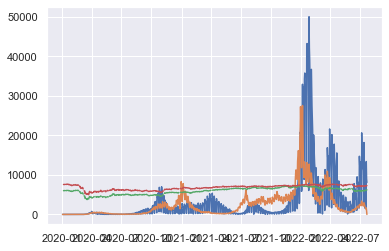

In [26]:
# the relation closing prices and new cases in different countries.

plt.plot(main_table["Date_reported"], main_table["New_casesFR"]/10)
plt.plot(main_table["Date_reported"], main_table["New_casesUK"]/10)
plt.plot(main_table["Date_reported"], main_table["CloseFR"])
plt.plot(main_table["Date_reported"], main_table["CloseUK"])

# in this case, new_cases columns are divided by 10 to fit the size.

In [27]:
main_table["CloseUK"].corr(main_table["CloseFR"])
# we can say they have similar reaction during the pandemic.

0.914692267905556

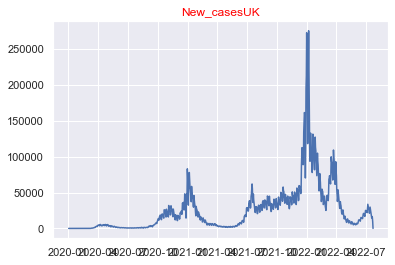

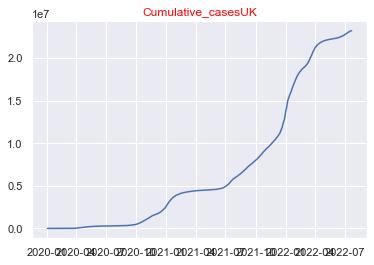

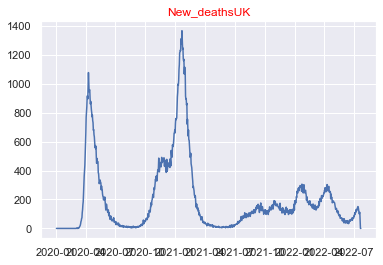

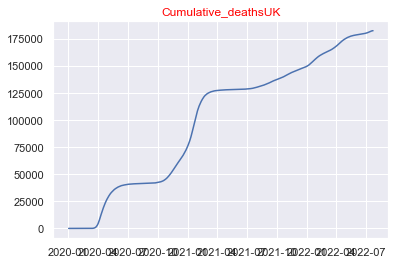

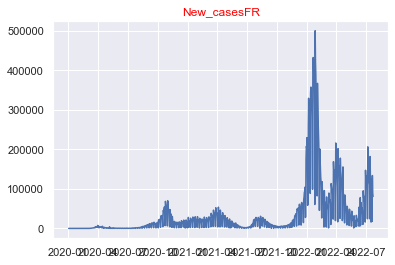

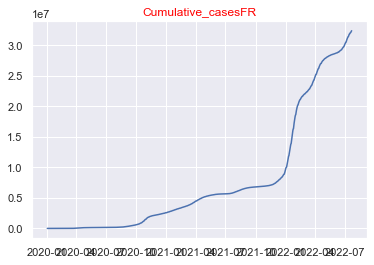

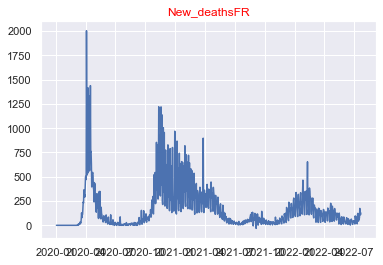

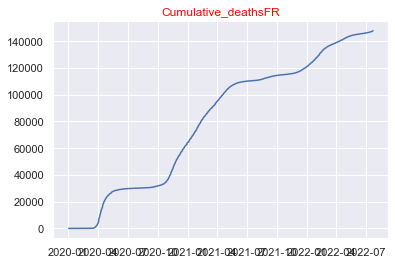

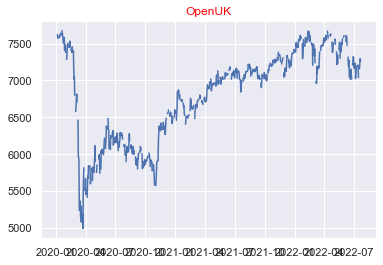

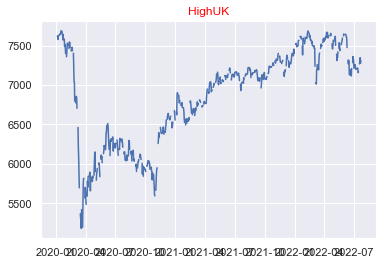

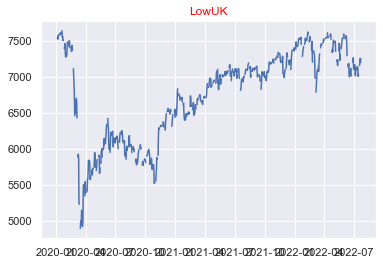

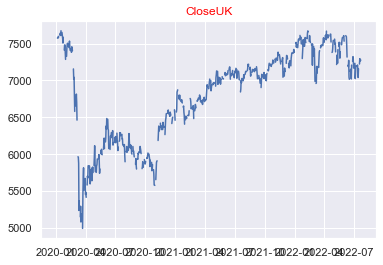

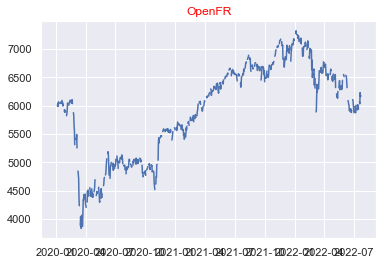

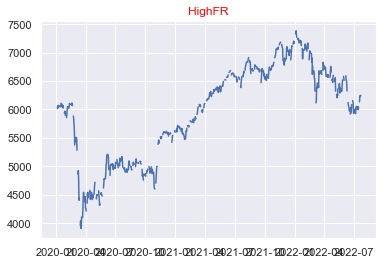

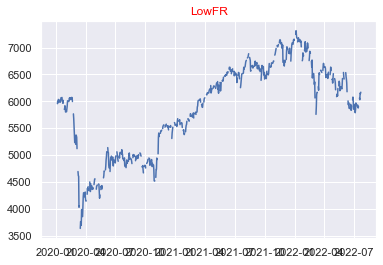

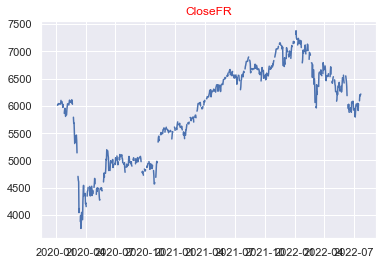

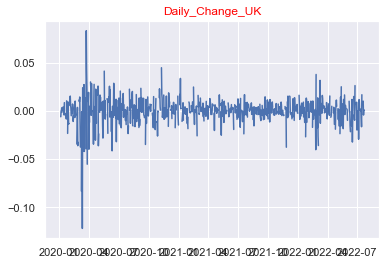

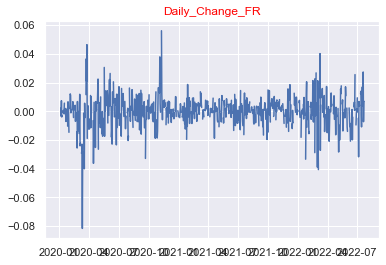

In [28]:
# the trends of the features by time (except date_reported column itself).

for e in main_table.columns:
    if e == "Date_reported":
         continue
    plt.rcParams.update({'text.color': "red"})
    plt.plot(main_table["Date_reported"], main_table[e])
    plt.title(e)
    plt.show()

In [29]:
# the stock market is closed at the weekends which means there would be no value for these days. At this point, 

# copying the data frame to have a bac up.
main_table_comparison = main_table.copy()

# removing the null values at the weekends. 
main_table_comparison.dropna(inplace=True)

# the weight dictionary, if it is needed to read it from this. 
manuel_weights = {"New_cases":1, "Cumulative_cases":0.5, "New_deaths":2, "Cumulativedeaths":1, "Daily_Change_UK":-1}
manuel_weights

{'New_cases': 1,
 'Cumulative_cases': 0.5,
 'New_deaths': 2,
 'Cumulativedeaths': 1,
 'Daily_Change_UK': -1}

In [30]:
#main_table_comparison.drop(columns="Date_reported", inplace=True)
main_table_comparison =  normalize(main_table_comparison)
main_table_comparison.head()

,Date_reported,New_casesUK,Cumulative_casesUK,New_deathsUK,Cumulative_deathsUK,New_casesFR,Cumulative_casesFR,New_deathsFR,Cumulative_deathsFR,OpenUK,HighUK,LowUK,CloseUK,OpenFR,HighFR,LowFR,CloseFR,Daily_Change_UK,Daily_Change_FR
196652,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.973790,0.974783,0.967667,0.980542,0.623541,0.614314,0.641736,0.632142,0.606675,0.636320
196655,0.003222,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.980542,0.973185,0.959304,0.962987,0.621605,0.606779,0.631050,0.623700,0.564794,0.607797
196656,0.004296,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.962987,0.966085,0.971731,0.962431,0.630786,0.620522,0.643205,0.623358,0.594134,0.567668
196657,0.005371,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.962431,0.956076,0.958166,0.962834,0.617475,0.610528,0.635809,0.628508,0.595789,0.646028
196658,0.006445,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.962834,0.975321,0.976398,0.971485,0.640403,0.622225,0.652481,0.631697,0.609979,0.563795


In [31]:
# it could (should) have been shorter by a for loop changing all the columns of the dataframe to  numpy arrays.					
array_New_casesUK                     =    np.array(main_table_comparison["New_casesUK"])
array_Cumulative_casesUK              =    np.array(main_table_comparison["Cumulative_casesUK"])
array_New_deathsUK                    =    np.array(main_table_comparison["New_deathsUK"])
array_Cumulative_deathsUK             =    np.array(main_table_comparison["Cumulative_deathsUK"])
array_New_casesFR                     =    np.array(main_table_comparison["New_casesFR"])
array_Cumulative_casesFR              =    np.array(main_table_comparison["Cumulative_casesFR"])
array_New_deathsFR                    =    np.array(main_table_comparison["New_deathsFR"])
array_Cumulative_deathsFR             =    np.array(main_table_comparison["Cumulative_deathsFR"])
array_OpenUK                          =    np.array(main_table_comparison["OpenUK"])
array_HighUK                          =    np.array(main_table_comparison["HighUK"])
array_LowUK                           =    np.array(main_table_comparison["LowUK"])
array_CloseUK                         =    np.array(main_table_comparison["CloseUK"])
array_OpenFR                          =    np.array(main_table_comparison["OpenFR"])
array_newHighFR_FR                    =    np.array(main_table_comparison["HighFR"])
array_LowFR                           =    np.array(main_table_comparison["LowFR"])
array_CloseFR                         =    np.array(main_table_comparison["CloseFR"])
array_Daily_Change_UK                 =    np.array(main_table_comparison["Daily_Change_UK"])
array_Daily_Change_FR                 =    np.array(main_table_comparison["Daily_Change_FR"])


# the default comparison value is 0.
new_comparison = np.zeros(array_New_casesUK.shape[0], dtype=int)

counter = 0
for nc_UK, cc_UK, nd_UK, cd_UK, nc_FR, cc_FR, nd_FR, cd_FR, close_UK, close_FR, change_UK, change_FR, idx in zip( 
array_New_casesUK        
,array_Cumulative_casesUK 
,array_New_deathsUK       
,array_Cumulative_deathsUK
,array_New_casesFR        
,array_Cumulative_casesFR 
,array_New_deathsFR       
,array_Cumulative_deathsFR             
,array_CloseUK                        
,array_CloseFR            
,array_Daily_Change_UK
,array_Daily_Change_FR       
,main_table_comparison.reset_index().index): 
    if nc_UK*1 + cc_UK*0.5 + nd_UK*2 + cd_UK*1 + change_UK*(-1) < nc_FR*1 + cc_FR*0.5 + nd_FR*2 + cd_FR*1 + change_FR*(-1):
        counter +=1
        new_comparison[idx] = 1
print(counter) 

# data frame columns are converted to numpy arrays.
# it calculates the performance changes it if it is 1. 

main_table_comparison['comparison'] = new_comparison.tolist()
# the comparison list is added to the main table to see the results.

224


In [32]:
main_table_comparison.head(10)

,Date_reported,New_casesUK,Cumulative_casesUK,New_deathsUK,Cumulative_deathsUK,New_casesFR,Cumulative_casesFR,New_deathsFR,Cumulative_deathsFR,OpenUK,HighUK,LowUK,CloseUK,OpenFR,HighFR,LowFR,CloseFR,Daily_Change_UK,Daily_Change_FR,comparison
196652,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.973790,0.974783,0.967667,0.980542,0.623541,0.614314,0.641736,0.632142,0.606675,0.636320,0
196655,0.003222,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.980542,0.973185,0.959304,0.962987,0.621605,0.606779,0.631050,0.623700,0.564794,0.607797,0
196656,0.004296,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.962987,0.966085,0.971731,0.962431,0.630786,0.620522,0.643205,0.623358,0.594134,0.567668,1
196657,0.005371,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.962431,0.956076,0.958166,0.962834,0.617475,0.610528,0.635809,0.628508,0.595789,0.646028,0
196658,0.006445,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.962834,0.975321,0.976398,0.971485,0.640403,0.622225,0.652481,0.631697,0.609979,0.563795,1
196659,0.007519,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.971485,0.976995,0.980097,0.967654,0.637532,0.618246,0.650889,0.630195,0.588492,0.569262,1
196662,0.010741,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.967654,0.978514,0.979163,0.978752,0.632992,0.618494,0.648184,0.629927,0.614141,0.587123,1
196663,0.011815,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.978752,0.984462,0.981462,0.980524,0.632000,0.614877,0.637786,0.631239,0.598133,0.596990,1
196664,0.012889,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.980524,0.981316,0.988989,0.988152,0.633511,0.616860,0.646269,0.628952,0.608144,0.580696,1
196665,0.013963,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.988152,0.985614,0.983833,0.975846,0.632622,0.618574,0.648917,0.630725,0.573949,0.592149,0


In [33]:
main_table_comparison[main_table_comparison.comparison == 1].shape[0] / main_table_comparison.shape[0]

# to see the percentages to understand who has more 1 values.
# the UK has a little bit more successful which makes it a little bit more successful in this case.

0.34674922600619196

In [34]:
# removing non-numerical datetime column. 
## main_table_comparison.drop(columns="Date_reported", inplace=True)
main_table_comparison.head()

,Date_reported,New_casesUK,Cumulative_casesUK,New_deathsUK,Cumulative_deathsUK,New_casesFR,Cumulative_casesFR,New_deathsFR,Cumulative_deathsFR,OpenUK,HighUK,LowUK,CloseUK,OpenFR,HighFR,LowFR,CloseFR,Daily_Change_UK,Daily_Change_FR,comparison
196652,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.973790,0.974783,0.967667,0.980542,0.623541,0.614314,0.641736,0.632142,0.606675,0.636320,0
196655,0.003222,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.980542,0.973185,0.959304,0.962987,0.621605,0.606779,0.631050,0.623700,0.564794,0.607797,0
196656,0.004296,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.962987,0.966085,0.971731,0.962431,0.630786,0.620522,0.643205,0.623358,0.594134,0.567668,1
196657,0.005371,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.962431,0.956076,0.958166,0.962834,0.617475,0.610528,0.635809,0.628508,0.595789,0.646028,0
196658,0.006445,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.962834,0.975321,0.976398,0.971485,0.640403,0.622225,0.652481,0.631697,0.609979,0.563795,1


In [35]:
# train - test split
# dropping the column to be predicted.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(main_table_comparison.drop('comparison',axis=1), main_table_comparison['comparison'], test_size=0.30, random_state=42)

In [36]:
# fitting the train set.
# predicting the y values.

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
predictions

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [37]:
# checking the accuracy.

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)
tn, fp, fn, tp  = confusion_matrix(y_test, predictions).ravel()
tn, fp, fn, tp 

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       115
           1       1.00      0.35      0.52        79

    accuracy                           0.74       194
   macro avg       0.85      0.68      0.67       194
weighted avg       0.82      0.74      0.70       194



(115, 0, 51, 28)

In [38]:
# manuel way to calculate metrics to understand what they really are easily. 

def perf_measure(y_test, predictions):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(predictions)):
        if y_test[i]==predictions[i]==0:
            TN += 1
        if predictions[i]==1 and y_test[i]!=predictions[i]:
            FP += 1
        if predictions[i]==0 and y_test[i]!=predictions[i]:
            FN += 1
        if y_test[i]==predictions[i]==1:
            TP += 1

    return(TN, FP, FN, TP)
    
perf_measure(np.array(y_test), predictions)

(115, 0, 51, 28)

In [39]:
# printing the tn, fp, fn, tp metrics.

print(
tn, "   of them were negative and predicted correctly\n ", 
fp, "   of them were positive and predicted as negative wrongly\n",
fn, "   of them were negative and predicted as positive wrongly\n",
tp, "   of them were positive and predicted correctly")

115    of them were negative and predicted correctly
  0    of them were positive and predicted as negative wrongly
 51    of them were negative and predicted as positive wrongly
 28    of them were positive and predicted correctly


In [40]:
# 
array_New_casesUK                     =    np.array(X_test["New_casesUK"])
array_Cumulative_casesUK              =    np.array(X_test["Cumulative_casesUK"])
array_New_deathsUK                    =    np.array(X_test["New_deathsUK"])
array_Cumulative_deathsUK             =    np.array(X_test["Cumulative_deathsUK"])
array_New_casesFR                     =    np.array(X_test["New_casesFR"])
array_Cumulative_casesFR              =    np.array(X_test["Cumulative_casesFR"])
array_New_deathsFR                    =    np.array(X_test["New_deathsFR"])
array_Cumulative_deathsFR             =    np.array(X_test["Cumulative_deathsFR"])
array_OpenUK                          =    np.array(X_test["OpenUK"])
array_HighUK                          =    np.array(X_test["HighUK"])
array_LowUK                           =    np.array(X_test["LowUK"])
array_CloseUK                         =    np.array(X_test["CloseUK"])
array_OpenFR                          =    np.array(X_test["OpenFR"])
array_newHighFR_FR                    =    np.array(X_test["HighFR"])
array_LowFR                           =    np.array(X_test["LowFR"])
array_CloseFR                         =    np.array(X_test["CloseFR"])
array_Daily_Change_UK                 =    np.array(X_test["Daily_Change_UK"])
array_Daily_Change_FR                 =    np.array(X_test["Daily_Change_FR"])


new_comparison = np.zeros(array_New_casesUK.shape[0], dtype=int)

counter = 0
for nc_UK, cc_UK, nd_UK, cd_UK, nc_FR, cc_FR, nd_FR, cd_FR, close_UK, close_FR, change_UK, change_FR, idx in zip( 
array_New_casesUK        
,array_Cumulative_casesUK 
,array_New_deathsUK       
,array_Cumulative_deathsUK
,array_New_casesFR        
,array_Cumulative_casesFR 
,array_New_deathsFR       
,array_Cumulative_deathsFR             
,array_CloseUK                        
,array_CloseFR            
,array_Daily_Change_UK
,array_Daily_Change_FR       
,main_table_comparison.reset_index().index): 
    if nc_UK*1 + cc_UK*0.5 + nd_UK*2 + cd_UK*1 + change_UK*(-1) < nc_FR*1 + cc_FR*0.5 + nd_FR*2 + cd_FR*1 + change_FR*(-1):
        counter +=1
        new_comparison[idx] = 1
print(counter) 

# adding the "comparison" column to the X_test data frame.
X_test['comparison'] = new_comparison.tolist()
X_test

#

79


,Date_reported,New_casesUK,Cumulative_casesUK,New_deathsUK,Cumulative_deathsUK,New_casesFR,Cumulative_casesFR,New_deathsFR,Cumulative_deathsFR,OpenUK,HighUK,LowUK,CloseUK,OpenFR,HighFR,LowFR,CloseFR,Daily_Change_UK,Daily_Change_FR,comparison
197567,0.982814,0.122166,0.985686,0.082723,0.990707,0.412643,0.948839,0.056094,0.990482,0.757863,0.804296,0.775882,0.788564,0.584622,0.580753,0.601401,0.595754,0.651567,0.642087,1
197184,0.571429,0.040094,0.202605,0.009517,0.704001,0.005544,0.174292,0.042244,0.742195,0.805597,0.786720,0.769822,0.754878,0.809766,0.799326,0.795351,0.777108,0.500598,0.495571,1
197142,0.526316,0.009320,0.194485,0.009517,0.701845,0.007767,0.163943,0.155817,0.711003,0.776776,0.782268,0.794424,0.796749,0.732809,0.713815,0.736203,0.726397,0.631719,0.588982,1
197075,0.454350,0.017954,0.183298,0.168375,0.680573,0.040778,0.111667,0.083102,0.581498,0.555660,0.570710,0.578161,0.594866,0.555544,0.545326,0.579589,0.562732,0.672896,0.620292,0
196756,0.111708,0.015727,0.004364,0.628843,0.094447,0.005236,0.003247,1.000000,0.115988,0.225227,0.189980,0.247732,0.236709,0.163026,0.146694,0.186567,0.164384,0.621766,0.505748,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197091,0.471536,0.024295,0.187278,0.069546,0.693127,0.060682,0.122636,0.275623,0.613097,0.675100,0.647640,0.676813,0.659828,0.635114,0.619549,0.653323,0.635085,0.565567,0.600660,1
197103,0.484425,0.013535,0.190049,0.028551,0.697122,0.087010,0.134469,0.094875,0.635955,0.651591,0.628925,0.659154,0.649942,0.619824,0.610122,0.639228,0.624231,0.591893,0.617599,1
196852,0.214823,0.001625,0.012778,0.010249,0.225604,0.002106,0.005239,0.009695,0.203308,0.472878,0.452295,0.494416,0.475941,0.371660,0.363697,0.398037,0.372616,0.601480,0.556605,1
197523,0.935553,0.018201,0.958705,0.051977,0.976145,0.033892,0.879705,0.009695,0.977933,0.893840,0.929751,0.908918,0.939896,0.721898,0.704811,0.714905,0.719006,0.675237,0.601828,0


In [41]:
# adding the "prediction" column next to the "comparison" column to understand what has done.
X_test["predictions"] = predictions
X_test

,Date_reported,New_casesUK,Cumulative_casesUK,New_deathsUK,Cumulative_deathsUK,New_casesFR,Cumulative_casesFR,New_deathsFR,Cumulative_deathsFR,OpenUK,...,LowUK,CloseUK,OpenFR,HighFR,LowFR,CloseFR,Daily_Change_UK,Daily_Change_FR,comparison,predictions
197567,0.982814,0.122166,0.985686,0.082723,0.990707,0.412643,0.948839,0.056094,0.990482,0.757863,...,0.775882,0.788564,0.584622,0.580753,0.601401,0.595754,0.651567,0.642087,1,1
197184,0.571429,0.040094,0.202605,0.009517,0.704001,0.005544,0.174292,0.042244,0.742195,0.805597,...,0.769822,0.754878,0.809766,0.799326,0.795351,0.777108,0.500598,0.495571,1,0
197142,0.526316,0.009320,0.194485,0.009517,0.701845,0.007767,0.163943,0.155817,0.711003,0.776776,...,0.794424,0.796749,0.732809,0.713815,0.736203,0.726397,0.631719,0.588982,1,0
197075,0.454350,0.017954,0.183298,0.168375,0.680573,0.040778,0.111667,0.083102,0.581498,0.555660,...,0.578161,0.594866,0.555544,0.545326,0.579589,0.562732,0.672896,0.620292,0,0
196756,0.111708,0.015727,0.004364,0.628843,0.094447,0.005236,0.003247,1.000000,0.115988,0.225227,...,0.247732,0.236709,0.163026,0.146694,0.186567,0.164384,0.621766,0.505748,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197091,0.471536,0.024295,0.187278,0.069546,0.693127,0.060682,0.122636,0.275623,0.613097,0.675100,...,0.676813,0.659828,0.635114,0.619549,0.653323,0.635085,0.565567,0.600660,1,1
197103,0.484425,0.013535,0.190049,0.028551,0.697122,0.087010,0.134469,0.094875,0.635955,0.651591,...,0.659154,0.649942,0.619824,0.610122,0.639228,0.624231,0.591893,0.617599,1,0
196852,0.214823,0.001625,0.012778,0.010249,0.225604,0.002106,0.005239,0.009695,0.203308,0.472878,...,0.494416,0.475941,0.371660,0.363697,0.398037,0.372616,0.601480,0.556605,1,0
197523,0.935553,0.018201,0.958705,0.051977,0.976145,0.033892,0.879705,0.009695,0.977933,0.893840,...,0.908918,0.939896,0.721898,0.704811,0.714905,0.719006,0.675237,0.601828,0,0


In [42]:
X_test[["comparison","predictions"]]

,comparison,predictions
197567,1,1
197184,1,0
197142,1,0
197075,0,0
196756,1,1
...,...,...
197091,1,1
197103,1,0
196852,1,0
197523,0,0


In [43]:
# a prediction of the number of New_caseUK column.

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_clean.drop('New_casesUK',axis=1), df_clean['New_casesUK'], test_size=0.30, random_state=42)

In [45]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
y_pred = logmodel.predict(X_test)
y_pred
#predictions_new_cases = logmodel.predict(X_test)
#predictions_new_cases

array([ 32980,      0,  98094,   2812,  70362,   2812,  87563,  15141,
         2812,   2812,  91572,  91572,  70362, 131514,  43558,   2812,
       116276,  91572,  96412,  19572,  95788,  20747,  91572,      0,
        98094,      0,  12684,  91572,  25089,   2812, 118759,      0,
       116276,  91572,  70362,  70362,  87563, 131514,  87563,  39704,
        15141,  20747,  20747,  87563,   2812,  82927,  25089,  82927,
        91572,      0,  87563,      0, 116276,  96412,      0,  43734,
        91572,  87563,  10781,  96412,  87563,  20747,  98094,  11746,
       116276, 116276,   2812,  61460,  11746,   2812,  19572, 116276,
        96412,  87563,   2812,  15141,  91572, 116276, 116276,  91572,
        61460,  87563, 104957,  67435,   2812, 108667, 116276,  91572,
        95788,  25089, 108667, 116276,  10781,  20747, 116276,  15141,
        98094, 116276,  95788, 116276,  32339,  98094,  15141,  17122,
        98094,  38777,  87563,  91572,  20747,  91572, 116276, 116276,
      

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.02857142857142857

In [47]:
X_test["y_test"] = y_test
#X_test["predictions_new_cases"] = predictions_new_cases
X_test["y_prediction"] = y_pred

X_test

,Cumulative_casesUK,New_deathsUK,Cumulative_deathsUK,New_casesFR,Cumulative_casesFR,New_deathsFR,Cumulative_deathsFR,y_test,y_prediction
197481,21640754,262,171288,107654,26175546,45,140080,27877,32980
196722,1410,8,25,586,2856,13,61,428,0
197283,7793473,139,137040,4527,6770902,20,114185,35851,98094
197158,4551313,10,128387,11821,5497073,75,107703,2365,2812
197355,10723778,147,146799,42222,7682100,29,117047,38782,70362
...,...,...,...,...,...,...,...,...,...
197239,6304341,81,131497,30757,6216600,57,111254,31517,91572
197080,4286001,154,125282,2364,3693556,431,87776,5937,98094
196954,1033132,314,47039,6351,1512058,544,36263,23649,0
197063,4141076,519,120432,20133,3405052,582,82383,14735,98094


In [48]:
# end of the jupyter file.
# thank you.